# Import necessary libraries

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load titanic dataset from Seaborn

In [11]:
df = sns.load_dataset('titanic')

# Display the first few rows of the dataset

    To get some idea about the dataset :

In [12]:
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


# Summary statistics and information about the dataset


In [18]:
print(df.shape)
print("-----**------**------**------**-----")

print(df.info())
print("-----**------**------**------**-----")
print(df.describe())

(891, 15)
-----**------**------**------**-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
-----**------**------**----

#lets print the nos of row and column

In [55]:
print("Row:", df.shape[0], "\ncloumn:", df.shape[1])

Row: 891 
cloumn: 15


#Access Specific Rows and Columns:



In [58]:
print(df.iloc[0])

survived                 0
pclass                   3
sex                   male
age                   22.0
sibsp                    1
parch                    0
fare                  7.25
embarked                 S
class                Third
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                False
Name: 0, dtype: object


In [59]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [57]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

#Iterate Through Rows:

In [ ]:
for index, row in df.iterrows():
    print(f"Index: {index}, Values: {row}")



#check for the missing values

In [69]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

#lets check for the % of missing values
    We will remove the data, if it have 40% missing value in column

In [70]:
null_values=df.isnull().sum().sort_values(ascending=False)

In [72]:
per_mis=(null_values/df.shape[0])*100

In [73]:
per_mis

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
survived        0.000000
pclass          0.000000
sex             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
class           0.000000
who             0.000000
adult_male      0.000000
alive           0.000000
alone           0.000000
dtype: float64

**Deleting** the column which have missing value >40%

Here is deck, so will delete it

Age have less missing values

In [74]:
#deleding teeh deck
df.drop('deck',axis=1,inplace=True)

In [77]:
#filling missing value with median

df['age'].fillna(df['age'].median(),inplace=True)

Deleting missiing value

In [84]:
df.dropna(subset=["embarked","embark_town"], inplace=True)

#checking if we have any missing values

In [85]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

#Now lets work on duplicate values

In [88]:
df.duplicated().sum()


116

In [90]:
#droping the missing values
df.drop_duplicates(inplace=True)

In [91]:
#checking again if the deplicate are deleted
df.duplicated().sum()


0

#Reset the index

Since we have deleted some data then we need to reset the index

In [92]:
df.reset_index(drop=True, inplace=True)

In [93]:
df.to_csv("clean_data",index_label=False)

#lets do the univariate
**How many are survived**            





In [96]:
df['survived'].value_counts()

0    455
1    318
Name: survived, dtype: int64

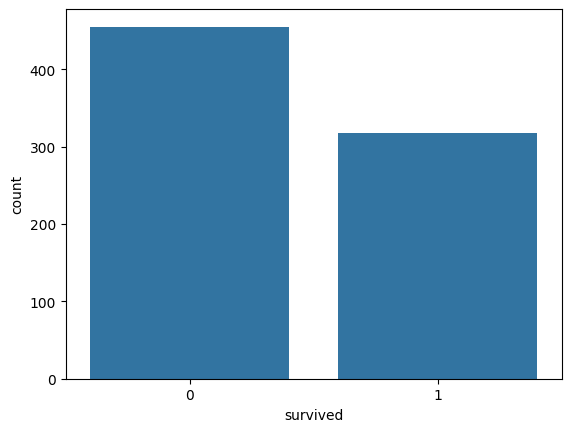

In [107]:
sns.countplot(x="survived",data=df,)
plt.show()
#df['survived'].value_counts().plot(kind='bar')

<Axes: >

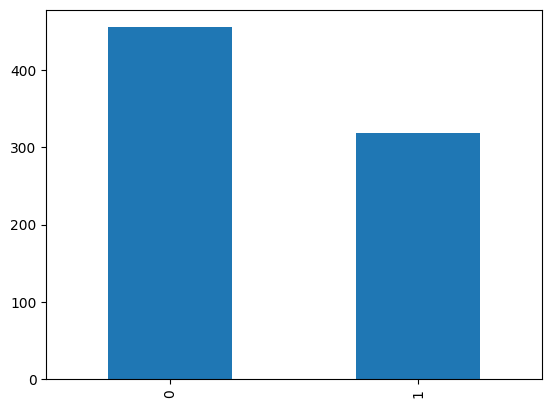

In [113]:
sns.countplot(df['embarked'])


#lets do the Bivariate


In [114]:
df.groupby("pclass")["survived"].sum()

pclass
1    131
2     83
3    104
Name: survived, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

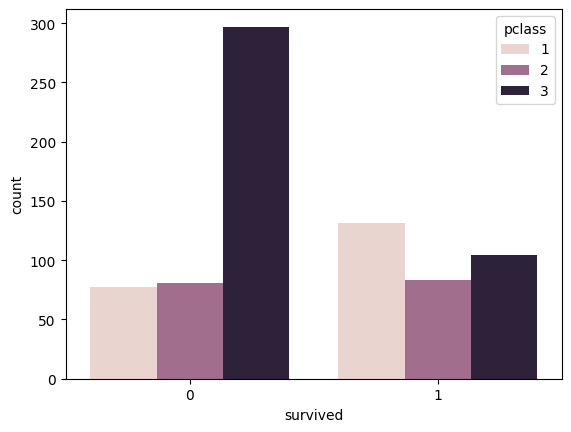

In [115]:
sns.countplot(data=df,x="survived",hue="pclass")

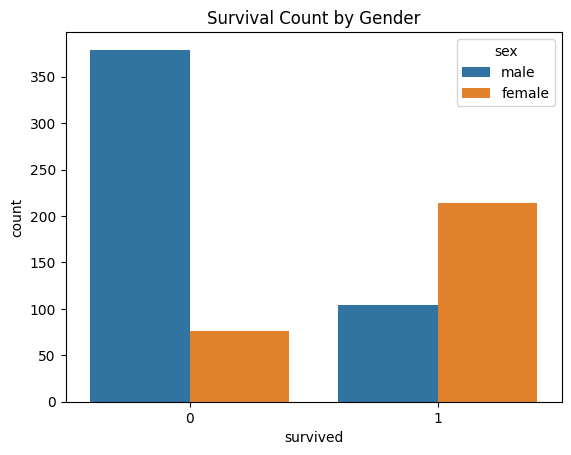

In [118]:
# Visualize survival rate by different features
sns.countplot(x='survived', data=df, hue='sex')
plt.title('Survival Count by Gender')
plt.show()

# Feature Engineering

In [119]:
# Create a new feature 'FamilySize' combining 'sibsp' and 'parch'
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

In [123]:
df["FamilySize"]

0      2
1      2
2      1
3      2
4      1
      ..
768    6
769    1
770    4
771    1
772    1
Name: FamilySize, Length: 773, dtype: int64

In [124]:
df["survived"]

0      0
1      1
2      1
3      1
4      0
      ..
768    0
769    1
770    0
771    1
772    0
Name: survived, Length: 773, dtype: int64

In [121]:
# Create a new feature 'IsAlone' based on 'FamilySize'
df['IsAlone'] = 1  # Initialize with 1 (assuming alone)
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0  # Update to 0 if not alone


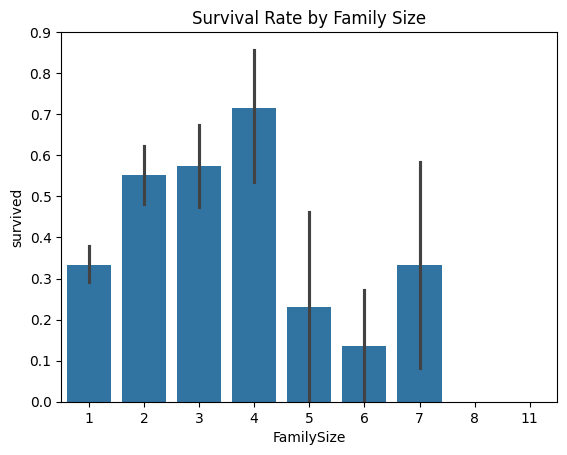

In [125]:
# Visualize the new features
sns.barplot(x='FamilySize', y='survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

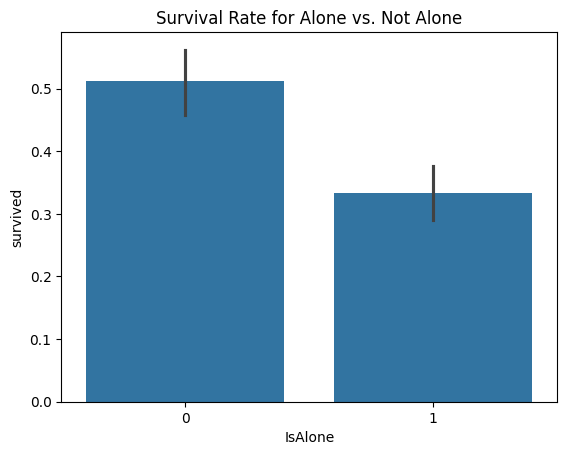

In [127]:
sns.barplot(x='IsAlone', y='survived', data=df)
plt.title('Survival Rate for Alone vs. Not Alone')
plt.show()

#Age Distribution and Survival:

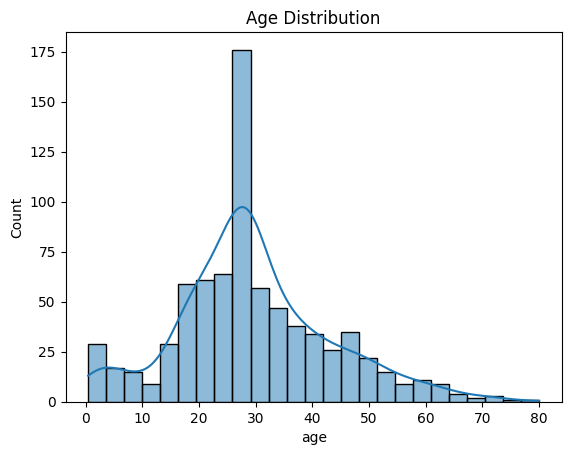

In [128]:
# Histogram of age distribution
sns.histplot(data=df, x='age', kde=True)
plt.title('Age Distribution')
plt.show()




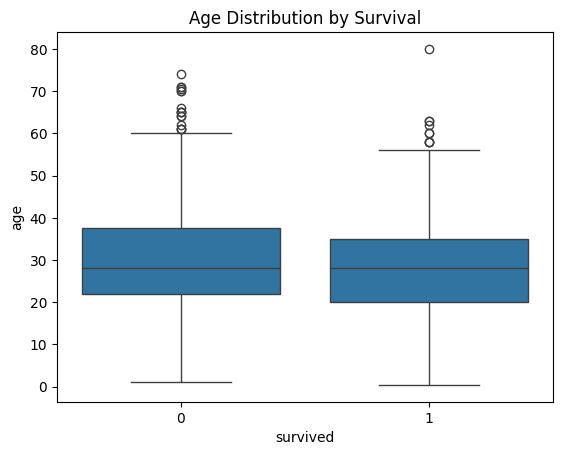

In [129]:
# Boxplot of age distribution by survival
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

#Fare Distribution and Survival:

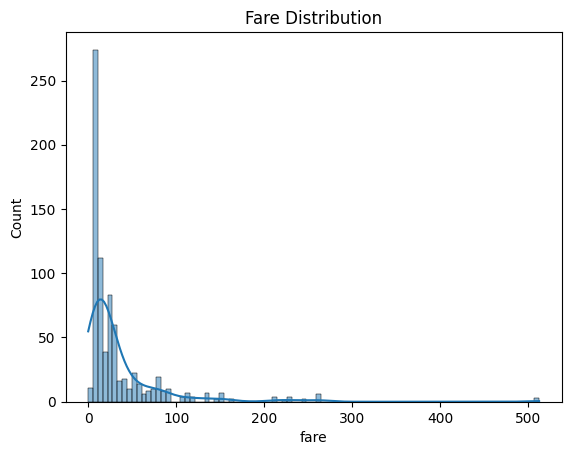

In [130]:
# Histogram of fare distribution
sns.histplot(data=df, x='fare', kde=True)
plt.title('Fare Distribution')
plt.show()




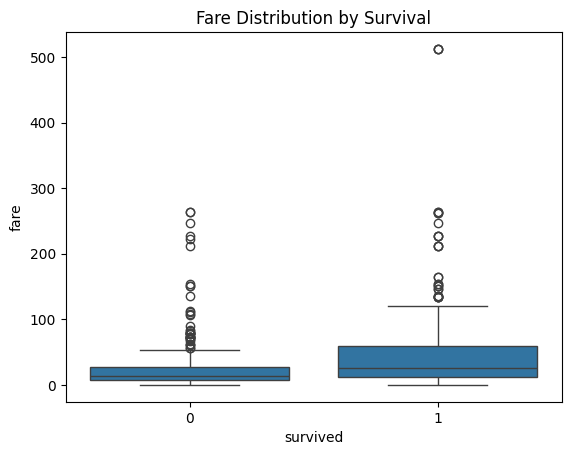

In [131]:
# Boxplot of fare distribution by survival
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

#Survival by Passenger Class and Gender:



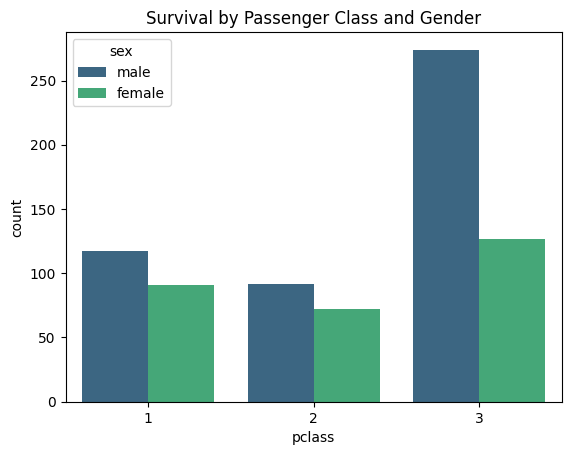

In [136]:
# Countplot of survival by passenger class and gender
sns.countplot(x='pclass', hue='sex', data=df, palette='viridis', hue_order=['male', 'female'], dodge=True)
plt.title('Survival by Passenger Class and Gender')
plt.show()


#Correlation Heatmap:



<ipython-input-137-17e15e5c5386>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


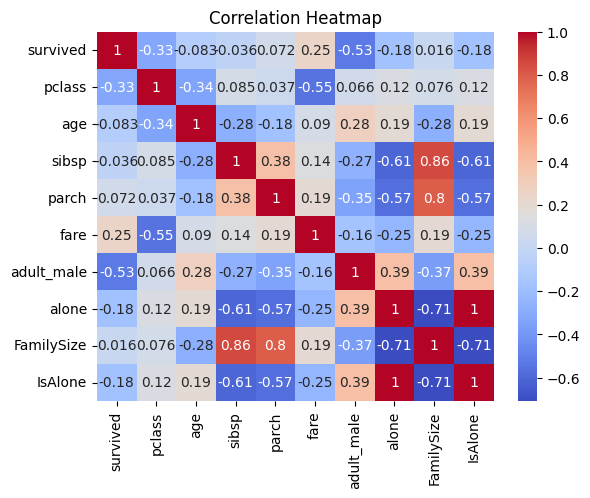

In [137]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#Embarkation Town and Survival:



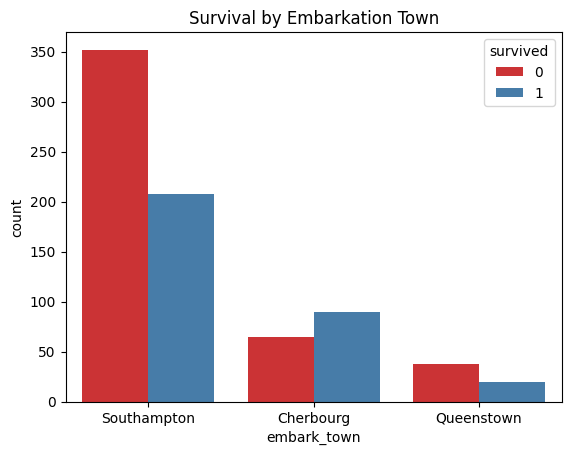

In [138]:
# Countplot of embarkation town and survival
sns.countplot(x='embark_town', hue='survived', data=df, palette='Set1')
plt.title('Survival by Embarkation Town')
plt.show()
